N = 6


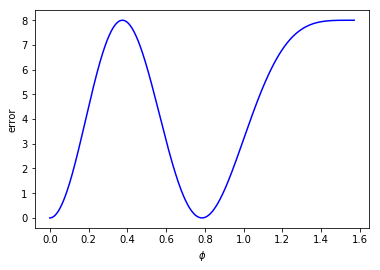

pp wedge(numerical):[array([3.23818061e-10, 8.00000000e+00, 8.00000000e+00]), array([0.7854 , 1.57069, 1.57074])]
N = 8


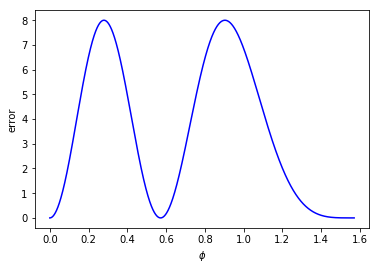

pp wedge(numerical):[array([2.70705015e-10]), array([0.57186])]
N = 10


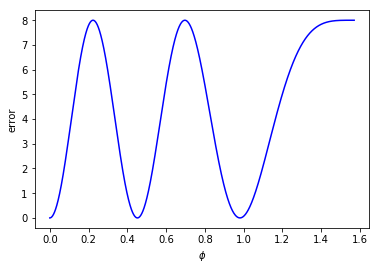

pp wedge(numerical):[array([8.62706659e-10, 4.70021215e-11, 8.00000000e+00]), array([0.45228, 0.98136, 1.57074])]
N = 12


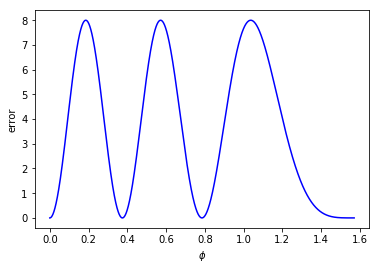

pp wedge(numerical):[array([1.05052008e-08, 1.29527224e-09]), array([0.37473, 0.7854 ])]
N = 14


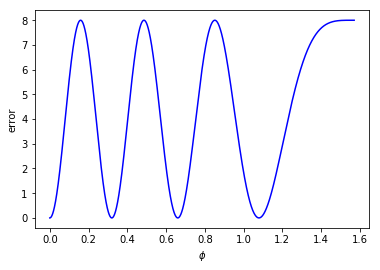

pp wedge(numerical):[array([3.86318924e-09, 4.93709640e-09, 5.73168870e-09, 8.00000000e+00]), array([0.32013, 0.66062, 1.07955, 1.57074])]
N = 16


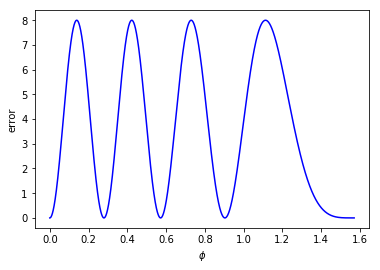

pp wedge(numerical):[array([2.19676690e-08, 1.08282006e-09, 9.01706539e-10]), array([0.27953, 0.57186, 0.90382])]
N = 18


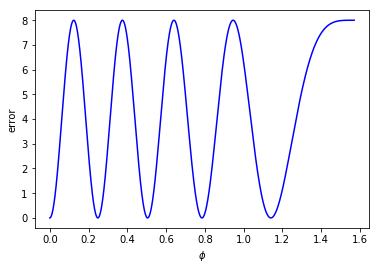

pp wedge(numerical):[array([1.48531650e-08, 2.51344327e-08, 2.91436255e-09, 1.48531742e-09,
       8.00000000e+00]), array([0.24811, 0.50487, 0.7854 , 1.14097, 1.57074])]


In [4]:
from matplotlib import pylab as plt
import math
import numpy as np


# tolerance
epsilon = 0.000001

# angle range for a wedge, phi goes from 0 to pi/4 
delta = 0.00001 #perhaps you can go smaller here with your sage account 
angle_range = np.arange(0,math.pi/2,delta)

#estimate the wedge angle that gives a ring wedge of period 2*n 
def pp_wedge(n):
    pp_angle = []
    min_error = []
    error = np.array([None]*len(angle_range))
    for i in range(len(angle_range)):
        phi =angle_range[i]
        identity = np.array([[1,0,0],
                           [0,1,0],
                           [0,0,1]])
        state = identity
        #run the simulation for this particular angle
        col_count = 0
        while col_count < n:
            state = next_state(state,phi)
            col_count += 1   
            
        error[i] =  find_error(state)
    
    plt.plot(angle_range, error, 'b-')
    plt.xlabel('$\phi$')
    plt.ylabel('error')
    plt.show()
    
    for i in range(1,len(angle_range)-1,1):
        if error[i-1] > error[i] and error[i+1] > error[i]:
            min_error = np.append(min_error, error[i])
            pp_angle = np.append(pp_angle, angle_range[i])
            
    return [min_error, pp_angle]
            
# error is the residual sum of squares between the transformation in the nth step and identity matrix    
def rotation_x(phi):
    return np.array([[cos(phi),0,-sin(phi)],
                        [0, 1, 0],
                        [sin(phi),0, cos(phi)]])
def rotation_omega(phi):
    return np.array([[1,0,0],
                        [0,cos(phi), -sin(phi)],
                        [0,sin(phi), cos(phi)]])

def reflection(gamma):
    return np.array([[-(1-gamma**2)/(1+gamma**2), -2*gamma/(1+gamma**2),0],
                                    [-2*gamma/(1+gamma**2),(1-gamma**2)/(1+gamma**2),0],
                                   [0,0,-1]])

#find the new state after a two-colliion pair
def next_state(current_state, phi):
    R_omega = rotation_omega(-phi)
    R_x = rotation_x(2*phi)
    return np.dot(np.dot(np.dot(R_omega, R_x), R_omega), current_state) 
            
        

def find_error(x):
    error = 0 
    for i in range(3):
        for j in range(3):
            if i == j: 
                error += (x[i][j]-1)**2 
            else:
                error += x[i][j]**2
    return error


#n is the number of left right two-collision pairs
n = 10

for i in range(3,n,1):
    print('N = ' + str(2*i)) #N is total number of collisions, which is twice the number of two-collision pairs n
    temp1 = pp_wedge(i)
    print('pp wedge(numerical):' + str(temp1))     